In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# Konversi USD ke IDR

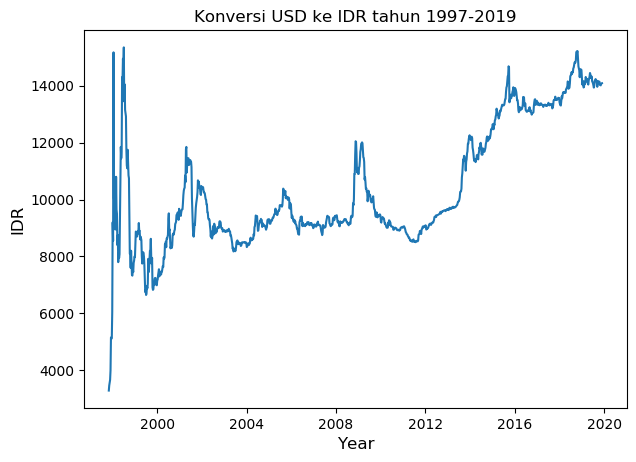

In [24]:
cr = pd.read_csv('Currency.csv', parse_dates=[0], index_col=[0])
plt.figure(figsize=[7,5], dpi=100)
plt.plot(cr)
plt.title('Konversi USD ke IDR tahun 1997-2019')
plt.xlabel('Year', fontsize=12)
plt.ylabel('IDR', fontsize=12)
plt.show()

## Function untuk mencari parameter p,d,q pada Auto Arima

In [14]:
model = pm.auto_arima(cr.Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=16729.737, BIC=16749.934, Fit time=0.269 seconds
Fit ARIMA: order=(0, 0, 0); AIC=20933.199, BIC=20943.297, Fit time=0.001 seconds
Fit ARIMA: order=(1, 0, 0); AIC=16771.736, BIC=16786.884, Fit time=0.145 seconds
Fit ARIMA: order=(0, 0, 1); AIC=19723.562, BIC=19738.710, Fit time=0.181 seconds
Fit ARIMA: order=(2, 0, 1); AIC=16669.883, BIC=16695.129, Fit time=0.410 seconds
Fit ARIMA: order=(2, 0, 0); AIC=16709.005, BIC=16729.202, Fit time=0.281 seconds
Fit ARIMA: order=(2, 0, 2); AIC=16652.786, BIC=16683.082, Fit time=0.602 seconds
Fit ARIMA: order=(3, 0, 3); AIC=16645.312, BIC=16685.706, Fit time=0.745 seconds
Fit ARIMA: order=(2, 0, 3); AIC=16651.147, BIC=16686.492, Fit time=0.625 seconds
Fit ARIMA: order=(3, 0, 2); AIC=16645.337, BIC=16680.682, Fit time=0.989 seconds
Total fit time: 4.260 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1152
Mo

## Data testing untuk ARIMA

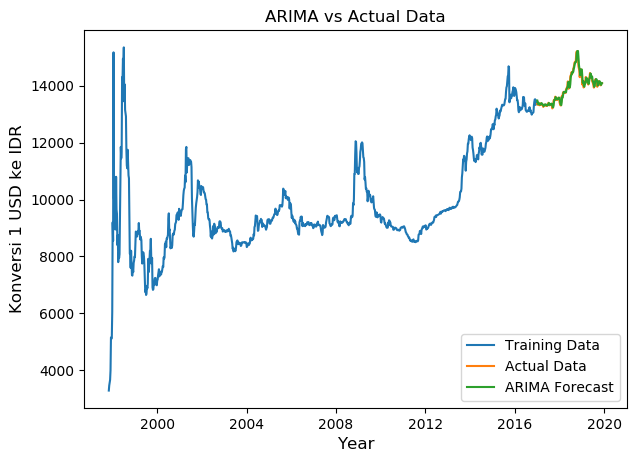

In [15]:
data = cr.Price.values
train = data[:1000]
test = data[1000:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=[1, 1, 0]) # Training Data (WAJIB)
    fit = model.fit() # Fit Model (WAJIB)
    hasil = fit.forecast()[0] # Hasil prediksi
    predictions.append(hasil) # Tambahkan hasil ke list prediksi
    history.append(test[t]) # Tambahkan data tahun tersebut untuk ARIMA selanjutnya
#----------------------------------------------Visualisation-------------------------------------#

plt.figure(figsize=[7,5], dpi=100)

train_df = pd.DataFrame(train, index=cr.index[0:1000])
test_df = pd.DataFrame(test, index=cr.index[1000:])
predictions_df = pd.DataFrame(predictions, index=cr.index[1000:])

plt.plot(train_df, label='Training Data')
plt.plot(test_df, label='Actual Data')
plt.plot(predictions_df, label='ARIMA Forecast')

plt.title('ARIMA vs Actual Data')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Konversi 1 USD ke IDR', fontsize=12)
plt.show()

## Prediksi ARIMA untuk tahun-tahun berikutnya

In [16]:
data = cr.Price.values
train = [x for x in data]
model = ARIMA(train, order=(1, 1, 0)) 
fit = model.fit()
future_forecast = fit.forecast(steps=10)[0]
for i in range (2019, 2031):
    print('Tahun %d: %f' % (i, future_forecast[2020-i]))

Tahun 2019: 14109.505348
Tahun 2020: 14100.397122
Tahun 2021: 14184.406787
Tahun 2022: 14175.050097
Tahun 2023: 14165.693393
Tahun 2024: 14156.336747
Tahun 2025: 14146.979861
Tahun 2026: 14137.623976
Tahun 2027: 14128.263900
Tahun 2028: 14118.921377
Tahun 2029: 14109.505348
Tahun 2030: 14100.397122


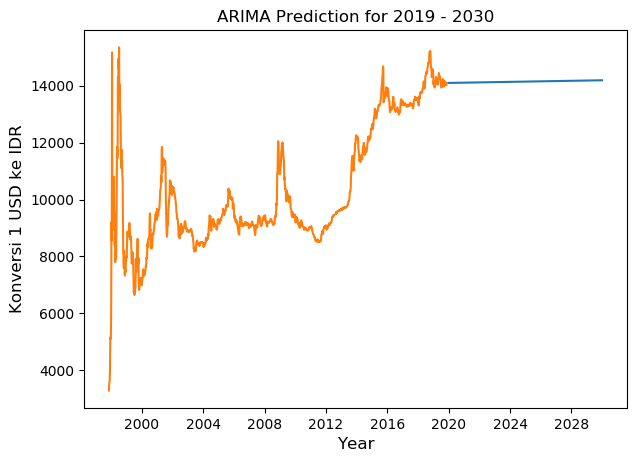

In [17]:
future_forecast = fit.forecast(steps=11)[0]
year = pd.date_range(start='2019', end='2030', freq='y')
future_df = pd.DataFrame(list(zip(year, future_forecast)), columns=['Date', 'Price'])
plt.figure(figsize=[7,5], dpi=100)
plt.plot(future_df.Date, future_df.Price)
plt.plot(cr)
plt.title('ARIMA Prediction for 2019 - 2030')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Konversi 1 USD ke IDR', fontsize=12)
plt.show()

# GDP Indonesia

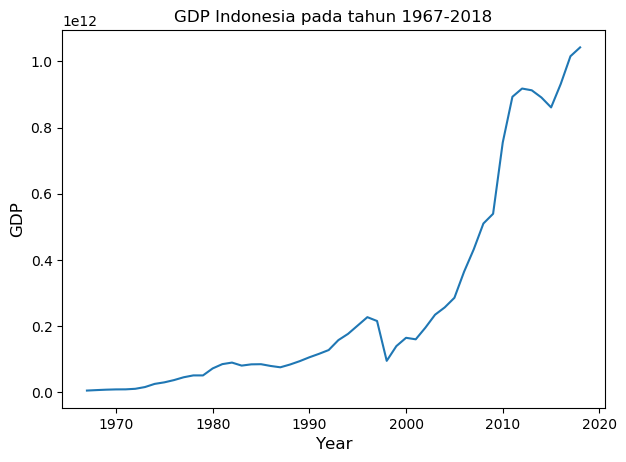

In [18]:
gdp = pd.read_csv('GDP.csv', parse_dates=[0], index_col=[0])

plt.figure(figsize=[7,5], dpi=100)
plt.plot(gdp)
plt.title('GDP Indonesia pada tahun 1967-2018')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.show()

## Function untuk mencari p,d,q pada ARIMA

In [19]:
model = pm.auto_arima(gdp.GDP, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=2594.515, BIC=2602.163, Fit time=0.055 seconds
Fit ARIMA: order=(0, 2, 0); AIC=2606.809, BIC=2610.633, Fit time=0.001 seconds
Fit ARIMA: order=(1, 2, 0); AIC=2605.446, BIC=2611.182, Fit time=0.020 seconds
Fit ARIMA: order=(0, 2, 1); AIC=2598.078, BIC=2603.814, Fit time=0.022 seconds
Fit ARIMA: order=(2, 2, 1); AIC=2596.186, BIC=2605.746, Fit time=0.113 seconds
Fit ARIMA: order=(1, 2, 2); AIC=2595.980, BIC=2605.540, Fit time=0.169 seconds
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.459 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   50
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1293.257
Method:                       css-mle   S.D. of innovations    40094699750.490
Date:                Sun, 15 Dec 2019   AIC                           2594.515
Time:                        22:31

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


## Data Testing untuk ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


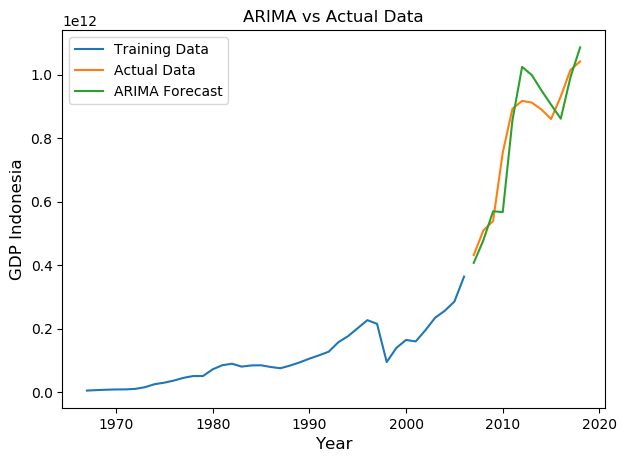

In [20]:
data = gdp.GDP.values
train = data[:40]
test = data[40:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=[1, 2, 1]) # Training Data (WAJIB)
    fit = model.fit() # Fit Model (WAJIB)
    hasil = fit.forecast()[0] # Hasil prediksi
    predictions.append(hasil) # Tambahkan hasil ke list prediksi
    history.append(test[t]) # Tambahkan data tahun tersebut untuk ARIMA selanjutnya
#----------------------------------------------Visualisation-------------------------------------#

plt.figure(figsize=[7,5], dpi=100)

train_df = pd.DataFrame(train, index=gdp.index[0:40])
test_df = pd.DataFrame(test, index=gdp.index[40:])
predictions_df = pd.DataFrame(predictions, index=gdp.index[40:])

plt.plot(train_df, label='Training Data')
plt.plot(test_df, label='Actual Data')
plt.plot(predictions_df, label='ARIMA Forecast')

plt.title('ARIMA vs Actual Data')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Indonesia', fontsize=12)
plt.show()

## Prediksi ARIMA untuk tahun-tahun berikutnya

In [21]:
data = gdp.GDP.values
train = [x for x in data]
model = ARIMA(train, order=(1, 1, 0)) 
fit = model.fit()
future_forecast = fit.forecast(steps=12)[0]
for i in range (2019, 2031):
    print('Tahun %d: %f' % (i, future_forecast[2020-i]))

Tahun 2019: 1086559901197.710205
Tahun 2020: 1065145038705.873779
Tahun 2021: 1290561020749.176758
Tahun 2022: 1270237228564.460205
Tahun 2023: 1249913216568.077148
Tahun 2024: 1229588671149.531494
Tahun 2025: 1209262831262.825439
Tahun 2026: 1188933850059.660400
Tahun 2027: 1168597245749.650879
Tahun 2028: 1148242142266.214111
Tahun 2029: 1127842146401.695312
Tahun 2030: 1107333209135.704834


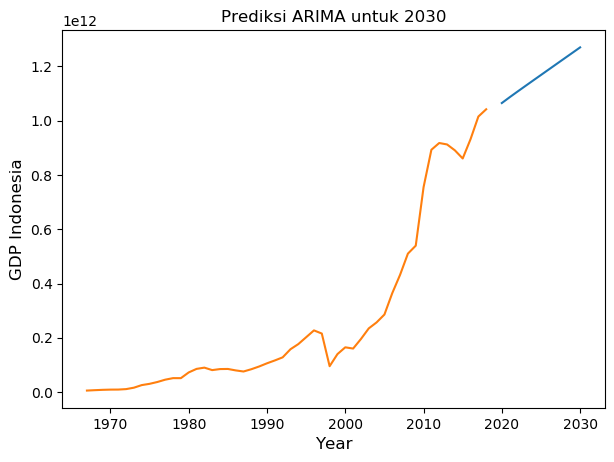

In [22]:
future_forecast = fit.forecast(steps=11)[0]
year = pd.date_range(start='2019', end='2030', freq='y')
future_df = pd.DataFrame(list(zip(year, future_forecast)), columns=['Date', 'GDP'])
plt.figure(figsize=[7,5], dpi=100)
plt.plot(future_df.Date, future_df.GDP)
plt.plot(gdp)
plt.title('Prediksi ARIMA untuk 2030')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Indonesia', fontsize=12)
plt.show()